In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Carregar os dados
df = pd.read_csv('carteirinha.csv', sep=';')

# Remover colunas onde todos os valores são nulos e criar uma cópia
df_limpo = df.dropna(axis=1, how='all').copy()

# Converter 'Dt_Nascimento' para datetime e calcular idade
df_limpo['Dt_Nascimento'] = pd.to_datetime(df_limpo['Dt_Nascimento'])
df_limpo['Idade'] = (datetime.now() - df_limpo['Dt_Nascimento']).dt.days // 365

# Mostrar estrutura final do DataFrame limpo
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              144 non-null    int64         
 1   CID             144 non-null    int64         
 2   Sexo            144 non-null    object        
 3   Tipo_Sanguineo  144 non-null    object        
 4   Dt_Nascimento   144 non-null    datetime64[ns]
 5   Naturalidade    144 non-null    object        
 6   Nacionalidade   144 non-null    object        
 7   CEP             144 non-null    int64         
 8   Bairro          144 non-null    object        
 9   Cidade          144 non-null    object        
 10  UF              144 non-null    object        
 11  QRCode          144 non-null    object        
 12  Dt_Validade     144 non-null    object        
 13  Dt_Inclusao     144 non-null    object        
 14  Idade           144 non-null    int64         
dtypes: dat

### **Analise por idade**

In [2]:
#Preparar dados para graficos e tabelas

# Definir faixas etárias
bins = [0, 2, 5, 12, 18, 30, 50, 100]
labels = ['0-2 anos', '3-5 anos', '6-12 anos', '13-18 anos', '19-30 anos', '31-50 anos', '51+ anos']
df_limpo['Faixa_Etaria'] = pd.cut(df_limpo['Idade'], bins=bins, labels=labels, right=False)  # right=False para incluir o limite inferior

In [3]:
# --- TABELA Distribuição de Idades por Faixa Etária ---
tabela = df_limpo['Faixa_Etaria'].value_counts().sort_index().reset_index()
tabela.columns = ['Faixa Etária', 'Número de Pessoas']
tabela['Porcentagem (%)'] = (tabela['Número de Pessoas'] / len(df) * 100).round(2)

# Estilização
tabela_estilizada = tabela.style \
    .background_gradient(subset=['Número de Pessoas'], cmap='Blues') \
    .format({'Porcentagem (%)': '{:.2f}%'}) \
    .set_caption('Distribuição de Idades por Faixa Etária')


# Exibir tabela
display(tabela_estilizada)

,Faixa Etária,Número de Pessoas,Porcentagem (%)
0,0-2 anos,9,6.25%
1,3-5 anos,32,22.22%
2,6-12 anos,63,43.75%
3,13-18 anos,19,13.19%
4,19-30 anos,4,2.78%
5,31-50 anos,9,6.25%
6,51+ anos,8,5.56%


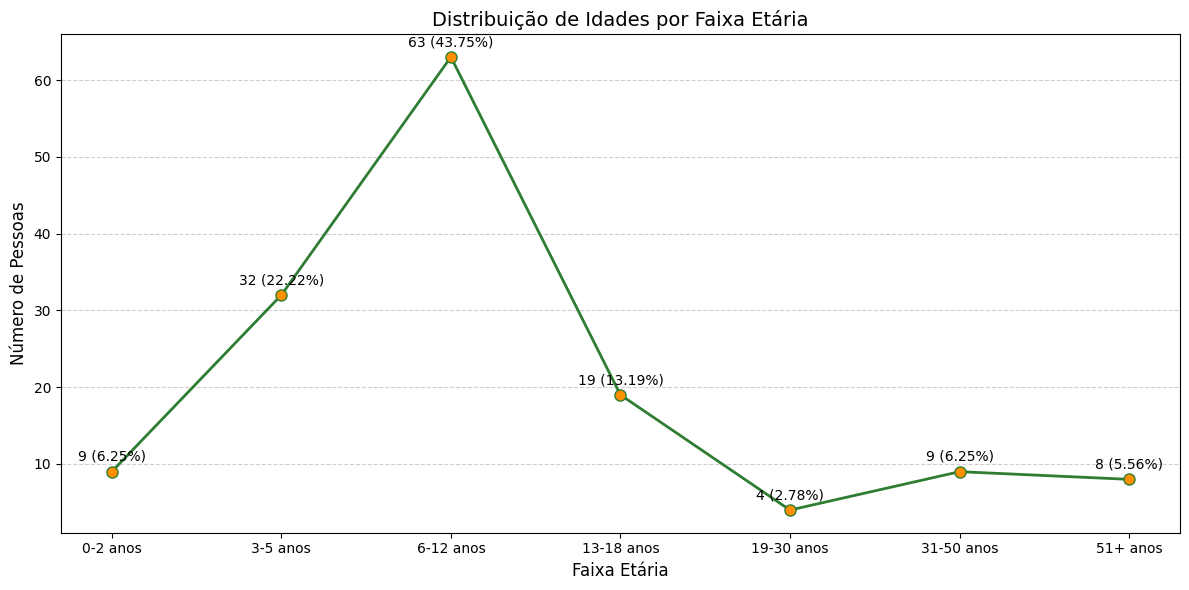

In [4]:
# --- GRÁFICO Distribuição de Idades por Faixa Etária ---
plt.figure(figsize=(12, 6))
plt.plot(tabela['Faixa Etária'], tabela['Número de Pessoas'],
         marker='o',
         markersize=8,
         linewidth=2,
         color='#2e7d32',
         markerfacecolor='#ff8f00')

# Personalização do gráfico
plt.title('Distribuição de Idades por Faixa Etária', fontsize=14)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Número de Pessoas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adicionar rótulos
for x, y in zip(tabela['Faixa Etária'], tabela['Número de Pessoas']):
    plt.text(x, y + 1, f'{y} ({tabela[tabela["Faixa Etária"] == x]["Porcentagem (%)"].values[0]}%)',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Exibir tabela e gráfico
plt.show()


Estatísticas descritivas da Idade:
count    144.000000
mean      12.125000
std       13.262743
min        0.000000
25%        4.000000
50%        8.000000
75%       13.000000
max       58.000000
Name: Idade, dtype: float64


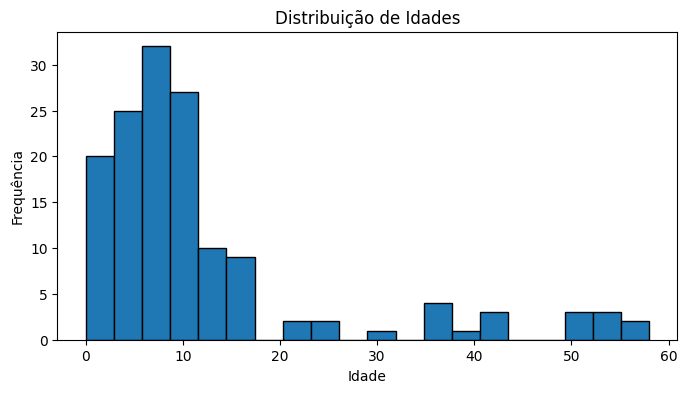

In [5]:
# --- GRAFICO Estatísticas descritivas da idade ---
print("\nEstatísticas descritivas da Idade:")
print(df_limpo['Idade'].describe())

# Histograma da distribuição de idades
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
df_limpo['Idade'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

### **Analise por sexo**

In [6]:
# --- TABELA Distribuição por Sexo ---
# Contagem por sexo
contagem_sexo = df['Sexo'].value_counts().reset_index()
contagem_sexo.columns = ['Sexo', 'Número de Pessoas']
contagem_sexo['Porcentagem (%)'] = (contagem_sexo['Número de Pessoas'] / len(df) * 100).round(2)

# Estilizar tabela
tabela_estilizada = contagem_sexo.style \
    .background_gradient(subset=['Número de Pessoas'], cmap='Blues') \
    .format({'Porcentagem (%)': '{:.2f}%'}) \
    .set_caption('Distribuição por Sexo')

display(tabela_estilizada)

,Sexo,Número de Pessoas,Porcentagem (%)
0,F,75,52.08%
1,M,69,47.92%


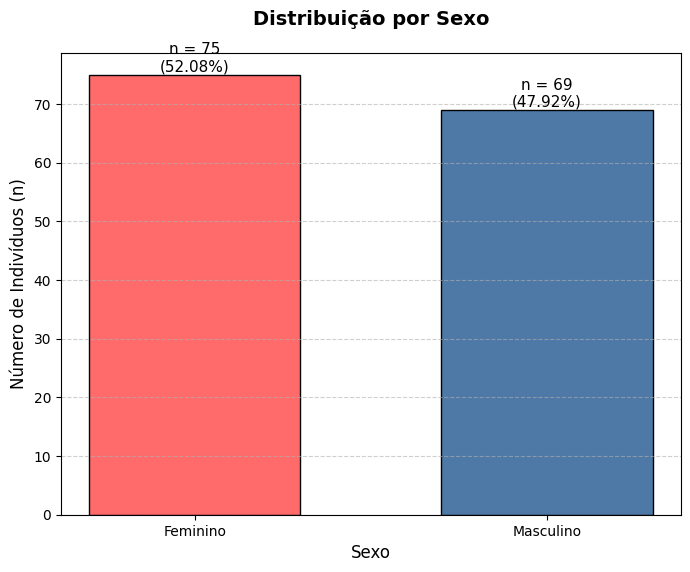

In [7]:
# --- TABELA Distribuição por Sexo ---
# Calcular totais e porcentagens diretamente do DataFrame
contagem = df['Sexo'].value_counts().rename(index={'F': 'Feminino', 'M': 'Masculino'})
porcentagens = (contagem / contagem.sum() * 100).round(2).astype(str) + '%'

# Configuração do gráfico
plt.figure(figsize=(8, 6))
bars = plt.bar(contagem.index, contagem.values,
               color=['#FF6B6B', '#4E79A7'],
               edgecolor='black',
               width=0.6)

# Títulos e labels
plt.title('Distribuição por Sexo', fontsize=14, pad=20, fontweight='bold')
plt.ylabel('Número de Indivíduos (n)', fontsize=12)
plt.xlabel('Sexo', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adicionar rótulos com valores e porcentagens
for bar, valor, porcent in zip(bars, contagem.values, porcentagens):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'n = {valor}\n({porcent})',
             ha='center', va='bottom', fontsize=11)

# Salvar em alta resolução
plt.savefig('distribuicao_sexo_auto.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# --- TABELA Sexo x Idade ---
df['Idade'] = (datetime.now() - pd.to_datetime(df['Dt_Nascimento'])).dt.days // 365

# Definir faixas etárias personalizadas
bins = [0, 12, 18, 30, 50, 100]
labels = ['0-12 anos', '13-18 anos', '19-30 anos', '31-50 anos', '51+ anos']
df['Faixa_Etaria'] = pd.cut(df['Idade'], bins=bins, labels=labels)

# Tabela cruzada com totais e porcentagens
tabela_cruzada = pd.crosstab(
    index=df['Faixa_Etaria'],
    columns=df['Sexo'].replace({'F': 'Feminino', 'M': 'Masculino'}),
    margins=True,
    margins_name='Total'
)

# Calcular porcentagens por linha
tabela_cruzada_pct = (tabela_cruzada.div(tabela_cruzada['Total'], axis=0) * 100).round(2)

# Combinar contagem e porcentagem
tabela_final = pd.concat([
    tabela_cruzada.iloc[:, :-1],
    tabela_cruzada_pct.add_suffix(' (%)')
], axis=1)

# Estilização
tabela_estilizada = tabela_final.style \
    .background_gradient(subset=['Feminino', 'Masculino'], cmap='Blues') \
    .format({'Feminino (%)': '{:.2f}%', 'Masculino (%)': '{:.2f}%'}) \
    .set_caption('Distribuição por Sexo e Faixa Etária')

display(tabela_estilizada)

Sexo,Feminino,Masculino,Feminino (%),Masculino (%),Total (%)
Faixa_Etaria,,,,,
0-12 anos,52,53,49.52%,50.48%,100.000000
13-18 anos,9,7,56.25%,43.75%,100.000000
19-30 anos,3,2,60.00%,40.00%,100.000000
31-50 anos,7,4,63.64%,36.36%,100.000000
51+ anos,2,3,40.00%,60.00%,100.000000
Total,73,69,51.41%,48.59%,100.000000


### **Analise por sexo x idade**

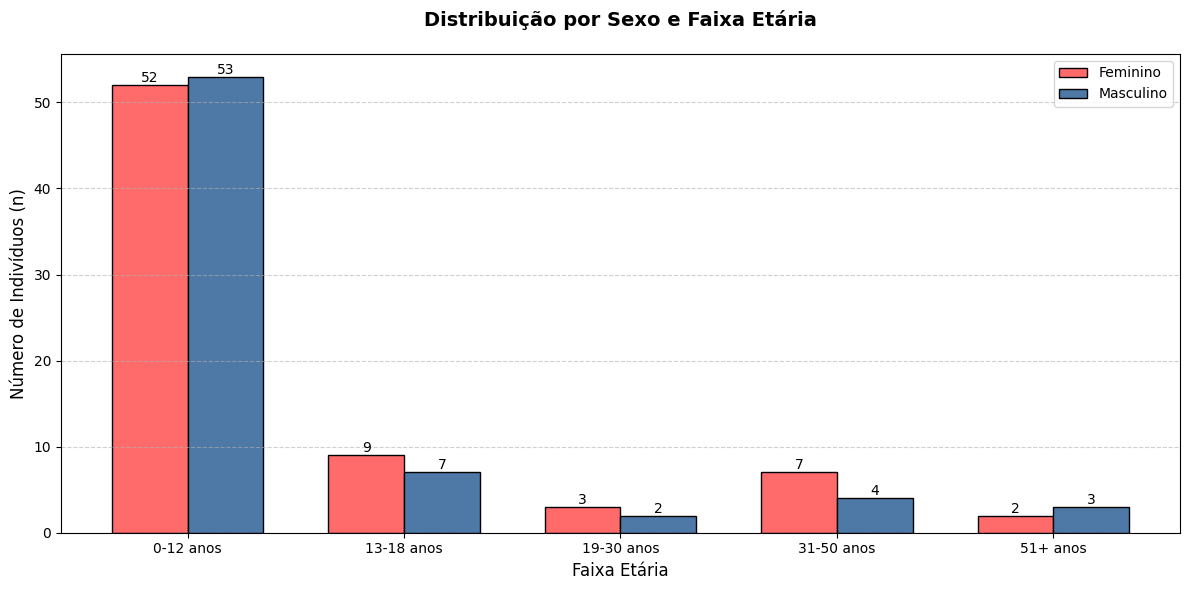

In [9]:
# --- GRAFICO Sexo x Idade ---

# Dados da tabela cruzada (já calculada anteriormente)
tabela_cruzada = pd.crosstab(
    index=df['Faixa_Etaria'],
    columns=df['Sexo'].replace({'F': 'Feminino', 'M': 'Masculino'})
)

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35  # Largura das barras
x = np.arange(len(tabela_cruzada))  # Posições no eixo X

# Barras para Feminino e Masculino
bars_f = ax.bar(x - width/2, tabela_cruzada['Feminino'], width,
                label='Feminino', color='#FF6B6B', edgecolor='black')
bars_m = ax.bar(x + width/2, tabela_cruzada['Masculino'], width,
                label='Masculino', color='#4E79A7', edgecolor='black')

# Personalização
ax.set_title('Distribuição por Sexo e Faixa Etária', fontsize=14, pad=20, fontweight='bold')
ax.set_xlabel('Faixa Etária', fontsize=12)
ax.set_ylabel('Número de Indivíduos (n)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(tabela_cruzada.index)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Adicionar rótulos com os valores
for bars in [bars_f, bars_m]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height,
                f'{height}',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Salvar em alta resolução
plt.savefig('grafico_sexo_idade.png', dpi=300, bbox_inches='tight')
plt.show()

### **Analise por tipo Sanguíneo**

In [10]:
# --- TABELA Tipo Sanguineo ---

# Dados simulados (você pode usar o seu próprio DataFrame aqui)
dados = {
    'Tipo Sanguíneo': ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-'],
    'Quantidade': [26, 17, 10, 12, 22, 18, 19, 20]
}
df = pd.DataFrame(dados)
df['Percentual (%)'] = round(df['Quantidade'] / df['Quantidade'].sum() * 100, 2)

# Adicionar total
total_row = pd.DataFrame([{
    'Tipo Sanguíneo': 'Total',
    'Quantidade': df['Quantidade'].sum(),
    'Percentual (%)': 100.0
}])
df = pd.concat([df, total_row], ignore_index=True)

# Função de estilo
def destacar_maior_e_total(val, col):
    if col == 'Quantidade':
        max_val = df[df['Tipo Sanguíneo'] != 'Total']['Quantidade'].max()
        if val == max_val:
            return 'background-color: #084594; color: white'  # Azul escuro
        elif val == df.loc[df['Tipo Sanguíneo'] == 'Total', 'Quantidade'].values[0]:
            return 'background-color: #084594; color: white'
    elif col == 'Tipo Sanguíneo' and val == 'Total':
        return 'background-color: #084594; color: white'
    return ''

# Aplicar estilo
styled = df.style.applymap(lambda v: destacar_maior_e_total(v, 'Quantidade'), subset=['Quantidade']) \
                 .applymap(lambda v: destacar_maior_e_total(v, 'Tipo Sanguíneo'), subset=['Tipo Sanguíneo'])

styled.format({'Percentual (%)': '{:.2f}%'})


C:\Users\fmaxi\AppData\Local\Temp\ipykernel_14452\1963603022.py:32: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled = df.style.applymap(lambda v: destacar_maior_e_total(v, 'Quantidade'), subset=['Quantidade']) \
C:\Users\fmaxi\AppData\Local\Temp\ipykernel_14452\1963603022.py:33: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda v: destacar_maior_e_total(v, 'Tipo Sanguíneo'), subset=['Tipo Sanguíneo'])


,Tipo Sanguíneo,Quantidade,Percentual (%)
0,A+,26,18.06%
1,A-,17,11.81%
2,AB+,10,6.94%
3,AB-,12,8.33%
4,B+,22,15.28%
5,B-,18,12.50%
6,O+,19,13.19%
7,O-,20,13.89%
8,Total,144,100.00%


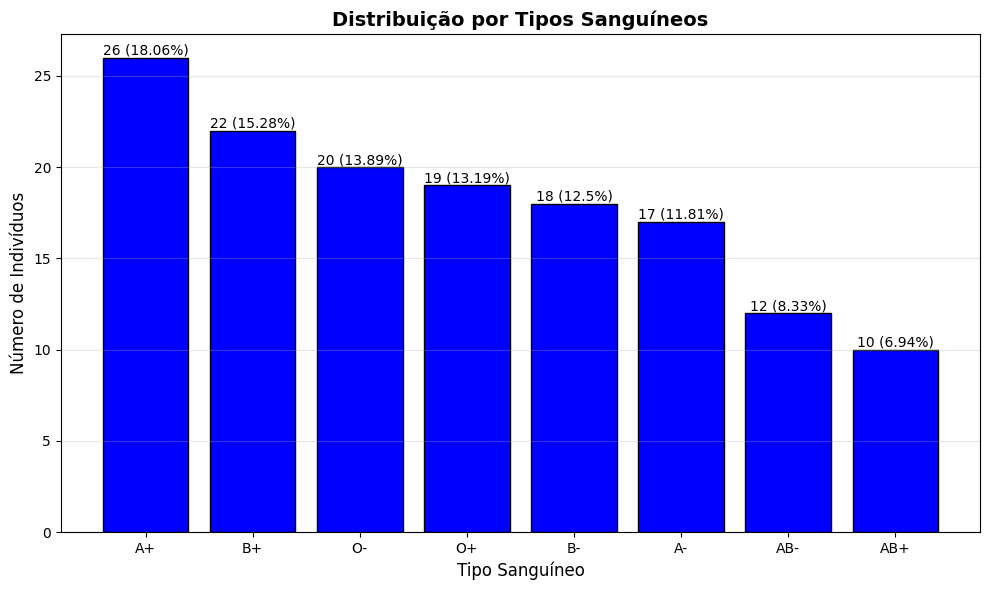

In [11]:
# --- GRAFICO Tipo Sanguineo ---
# Carregar dados
df = pd.read_csv('carteirinha.csv', delimiter=';', encoding='utf-8')

# 1. Criar tabela de distribuição
distribuicao_sangue = df['Tipo_Sanguineo'].value_counts().reset_index()
distribuicao_sangue.columns = ['Tipo Sanguíneo', 'Número de Indivíduos']
distribuicao_sangue['Porcentagem (%)'] = (distribuicao_sangue['Número de Indivíduos'] / len(df) * 100).round(2)

# 2. Ordenar por tipo sanguíneo (opcional: ordenar por frequência)
distribuicao_ordenada = distribuicao_sangue.sort_values('Número de Indivíduos', ascending=False)

# 3. Plotar gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(distribuicao_ordenada['Tipo Sanguíneo'],
               distribuicao_ordenada['Número de Indivíduos'],
               color='blue',
               edgecolor='black')

# Personalização
plt.title('Distribuição por Tipos Sanguíneos', fontsize=14, fontweight='bold')
plt.xlabel('Tipo Sanguíneo', fontsize=12)
plt.ylabel('Número de Indivíduos', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Adicionar porcentagens
for bar in bars:
    height = bar.get_height()
    porcentagem = (height / len(df) * 100).round(2)
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height} ({porcentagem}%)',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('grafico_tipo_sanguineo.png', dpi=300)
plt.show()

### **Analise por bairro**

In [12]:
# --- TABELA Bairros ---

# Contagem por bairro
tabela_bairros = df['Bairro'].value_counts().reset_index()
tabela_bairros.columns = ['Bairro', 'Número de Indivíduos']
tabela_bairros['Porcentagem (%)'] = (tabela_bairros['Número de Indivíduos'] / len(df) * 100).round(2)

# Ordenar por maior frequência
tabela_bairros = tabela_bairros.sort_values('Número de Indivíduos', ascending=False)

# Estilização com gradiente de cores
tabela_estilizada = tabela_bairros.style \
    .background_gradient(subset=['Número de Indivíduos'], cmap='Blues') \
    .format({'Porcentagem (%)': '{:.2f}%'}) \
    .set_caption('Distribuição por Bairro') \
    .set_properties(**{'text-align': 'left'})

display(tabela_estilizada)

,Bairro,Número de Indivíduos,Porcentagem (%)
0,Parque Rodrigo Barreto,28,19.44%
1,Mirante do Arujá,16,11.11%
2,Jardim Fazenda Rincão,14,9.72%
3,"Arujázinho I, II e III",14,9.72%
4,Arujá Centro Residencial,12,8.33%
5,Arujá Country Club,11,7.64%
6,Residencial Real Park,10,6.94%
7,Centro,8,5.56%
8,Jardim Cury,7,4.86%
9,Arujamérica,7,4.86%


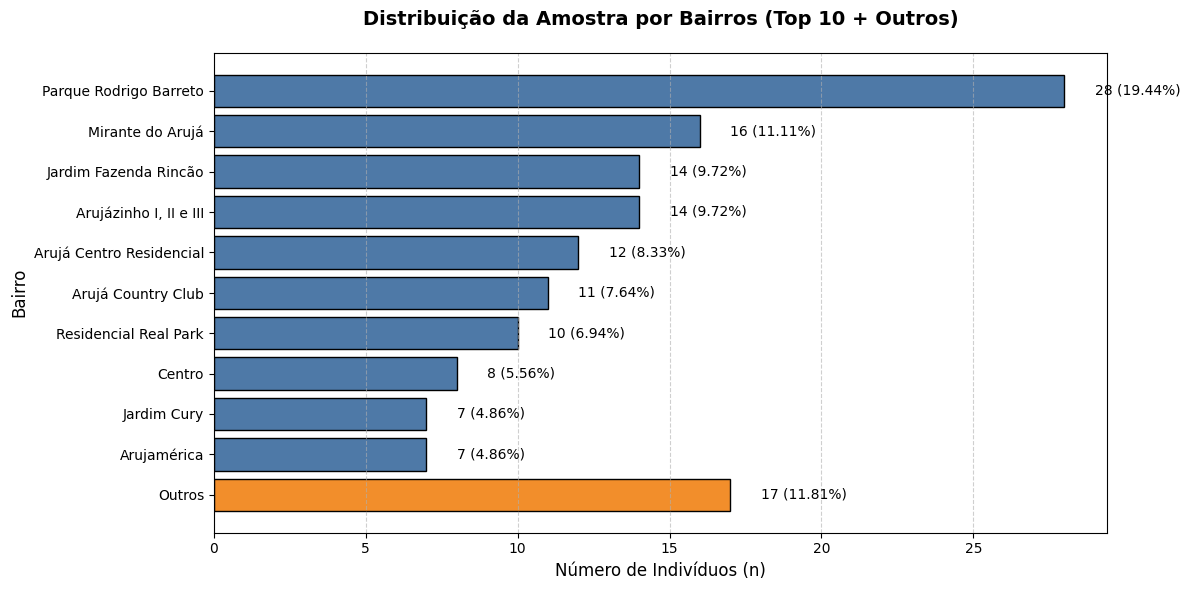

In [57]:
# --- GRAFICO Bairros ---

# Dados da tabela de bairros (já processada anteriormente)
top10 = tabela_bairros.head(10)
outros = pd.DataFrame({
    'Bairro': ['Outros'],
    'Número de Indivíduos': [tabela_bairros['Número de Indivíduos'][10:].sum()],
    'Porcentagem (%)': [tabela_bairros['Porcentagem (%)'][10:].sum().round(2)]
})
dados_plot = pd.concat([top10, outros], ignore_index=True)

# Configuração do gráfico
plt.figure(figsize=(12, 6))
bars = plt.barh(dados_plot['Bairro'], dados_plot['Número de Indivíduos'],
                color=['#4e79a7']*10 + ['#f28e2b'],  # Destaque para "Outros"
                edgecolor='black')

# Personalização
plt.title('Distribuição da Amostra por Bairros (Top 10 + Outros)', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Número de Indivíduos (n)', fontsize=12)
plt.ylabel('Bairro', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # Maior valor no topo

# Adicionar rótulos
for bar, porcent in zip(bars, dados_plot['Porcentagem (%)']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width} ({porcent}%)',
             va='center', ha='left', fontsize=10)

plt.tight_layout()

# Salvar em alta resolução
plt.savefig('distribuicao_bairros.png', dpi=300, bbox_inches='tight')
plt.show()

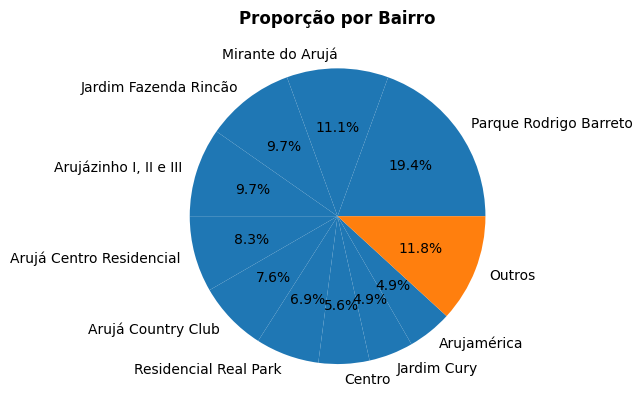

In [58]:
# --- GRAFICO Proporção por Bairro ---

plt.pie(dados_plot['Número de Indivíduos'],
        labels=dados_plot['Bairro'],
        autopct='%1.1f%%',
        colors=['#1f77b4']*10 + ['#ff7f0e'])
plt.title('Proporção por Bairro', fontweight='bold')
plt.savefig('pizza_bairros.png', dpi=300)

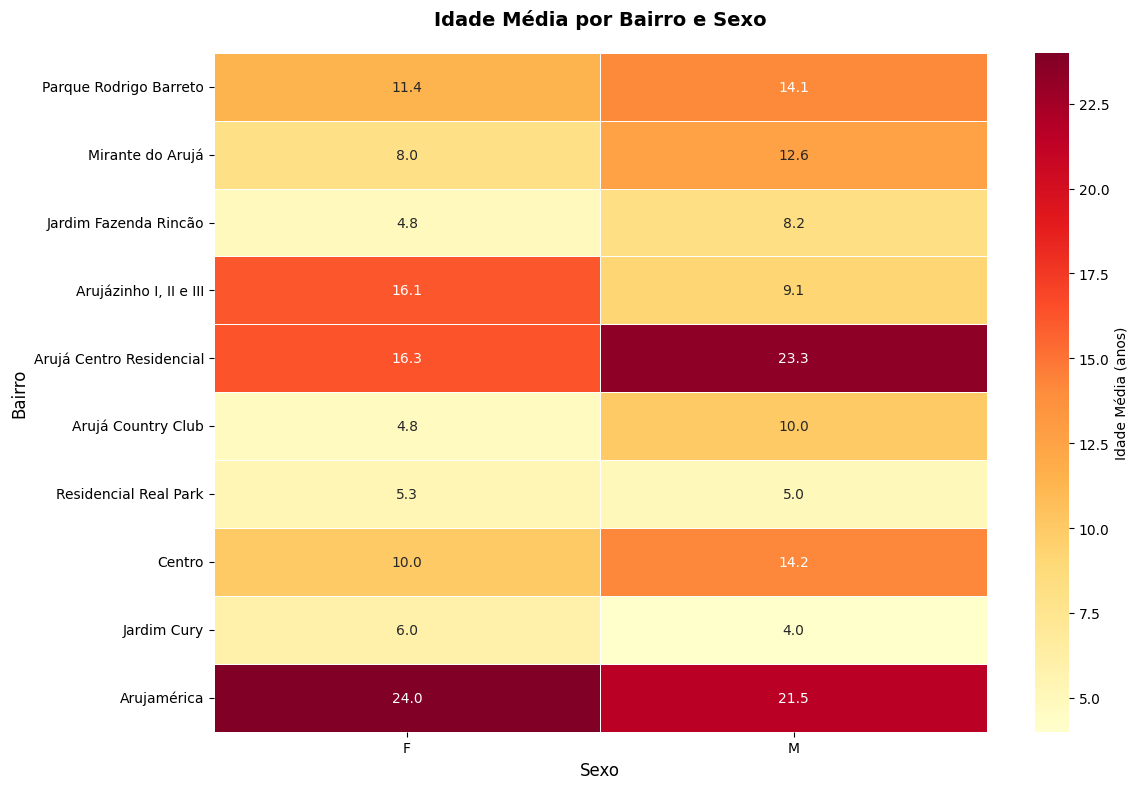

In [13]:
# --- GRAFICO Idade Média por Bairro e Sexo ---

# Agrupar por bairro e sexo (idade média)
heatmap_data = df_limpo.groupby(['Bairro', 'Sexo'])['Idade'].mean().unstack()

# Ordenar por bairros mais populosos (opcional)
top_bairros = df['Bairro'].value_counts().head(10).index
heatmap_data = heatmap_data.loc[top_bairros]

# Configurar mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap='YlOrRd',
    fmt='.1f',
    linewidths=0.5,
    cbar_kws={'label': 'Idade Média (anos)'}
)

# Personalização
plt.title('Idade Média por Bairro e Sexo', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Bairro', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Salvar
plt.savefig('heatmap_bairro_sexo_idade.png', dpi=300, bbox_inches='tight')
plt.show()